<a href="https://colab.research.google.com/github/PatLeRana/deeplearning/blob/master/KNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# KNN and Euclidian Distance by PRA

In [0]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
# F1 = 2*((precision*recall)/(precision+recall))
from google.colab import files

In [0]:
# uploaded = files.upload()

In [48]:
from google.colab import drive
drive.mount('/content/drive')
trainpath='/content/drive/My Drive/Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# cd to the file
# List files 
%cd /content/drive/My\ Drive/Dataset
!pwd
!ls -al
!chmod 777 *


In [49]:

#mydf=pd.read_csv('gdrive/My Drive/data.csv')
import pandas as pd
fname='diabetes.csv'
data=trainpath+'/'+fname
#mydf = pd.read_csv('/content/drive/My Drive/Dataset/diabetes.csv')
print (data)
mydf=pd.read_csv(data)
len(mydf)

/content/drive/My Drive/Dataset/diabetes.csv


768

In [50]:
mydf.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    mydf[col]= mydf[col].replace(0,np.NaN)
    mean = int(mydf[col].mean(skipna=True))
    mydf[col] = mydf[col].replace(np.NaN,mean)

In [52]:
mydf.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,155.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,155.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,155.0,32.0,0.232,54,1


Exploring Data to see relationships before proceeding

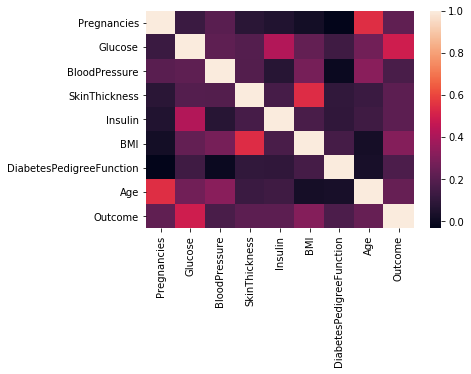

In [53]:
import seaborn as sns
sns.heatmap(mydf.corr())

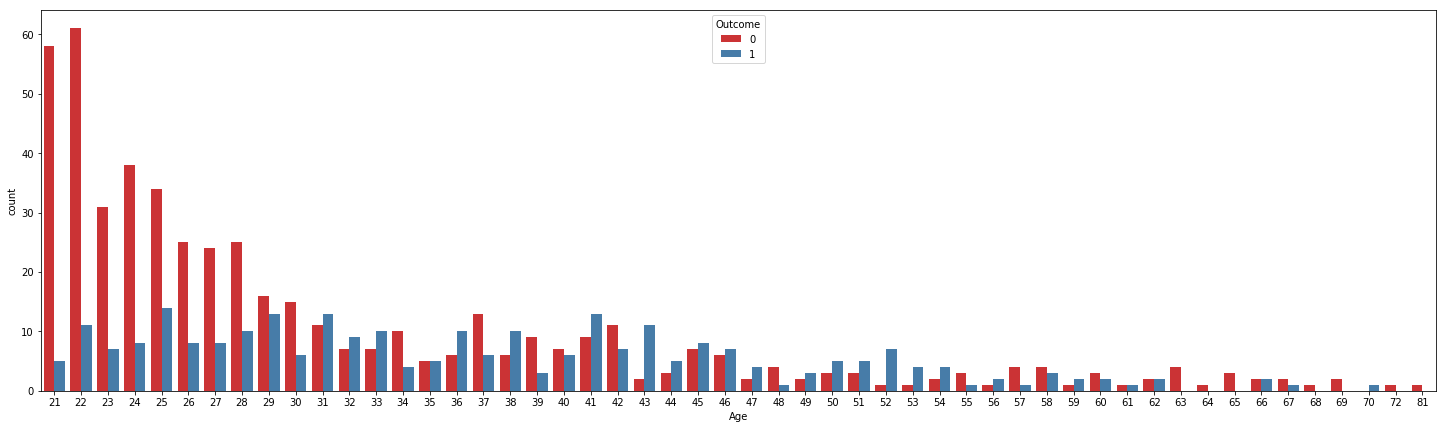

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=mydf,palette='Set1')

In [55]:
# extrqcting X and y (independant and dependant variables)
# build a matrix of X and a vector y ici constitue par la 8eme colonne
X = mydf.iloc[:, 0:-1].values
y = mydf.iloc[:,8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
# split data in test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=0)

feature scaling

In [0]:
# Feature scaling :: min max normalization :: X'=(X-Xmim)/(Xmax-Xmin)
# Feature scaling :: average normalization :: X'=(X-Xaverage)/(Xmax-Xmin)
# Feature scaling :: standardization       :: X'=(X-Mu)/Sigma :: mean & std dev
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

loqding KNN model

In [0]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

fitting model

In [61]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

making prediction

In [0]:
y_pred = classifier.predict(X_test)

evaluate the model

In [63]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[86 21]
 [16 31]]
0.6262626262626262


check accuracy

In [64]:
print(accuracy_score(y_test,y_pred))

0.7597402597402597


dont run the following code

In [0]:
# split the dataset en Train et Test
#from sklearn.model_selection import train_test_split
#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size =0.25, 
                                                   random_state = 42)
# Feature scaling :: min max normalization :: X'=(X-Xmim)/(Xmax-Xmin)
# Feature scaling :: average normalization :: X'=(X-Xaverage)/(Xmax-Xmin)
# Feature scaling :: standardization       :: X'=(X-Mu)/Sigma :: mean & std dev
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# matrix.reshape est requis quand ca vrille le fit_transform et transform
X_test=X_test.reshape(-1, 1)
X_train=X_train.reshape(-1,1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#c koi la difference
#parameter evaluation
knnclf = KNeighborsClassifier()
parameters={'n_neighbors': range(1, 20)}
gridsearch=GridSearchCV(knnclf, parameters, cv=100, scoring='roc_auc')
#using grid search cross validation
#Receving operating characteristics metrics 
# find the best param and best score
sc = StandardScaler()
gridsearch.fit(X,y)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
knnClassifier = KNeighborsClassifier(n_neighbors = 18)
knnClassifier.fit(X_train, y_train)

#knnClassifier.fit(np.matrix(X_train), np.matrix(y_train))
#print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knnClassifier.score(X_train, y_train)))
#print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

print (knnClassifier.fit(X_train, y_train).score(X_test, y_test))


don't run the following code

random_state is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Parameter evaluation
knnclf = KNeighborsClassifier()
parameters={'n_neighbors': range(1, 20)}
gridsearch=GridSearchCV(knnclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Fitting K-NN to the Training set
knnClassifier = KNeighborsClassifier(n_neighbors = 18)
knnClassifier.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knnClassifier.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knnClassifier.score(X_test, y_test)))

# Predicting the Test set results
y_pred = knnClassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(roc_auc_score(y_test,y_pred),5)